In [11]:
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
from keras import Sequential
from keras.layers import Dense
from keras.layers import LSTM, GRU
from keras.layers import Activation
from keras.layers import Dropout
import pickle
import warnings
warnings.filterwarnings("ignore")
import logging
logging.getLogger('tensorflow').setLevel(logging.ERROR)

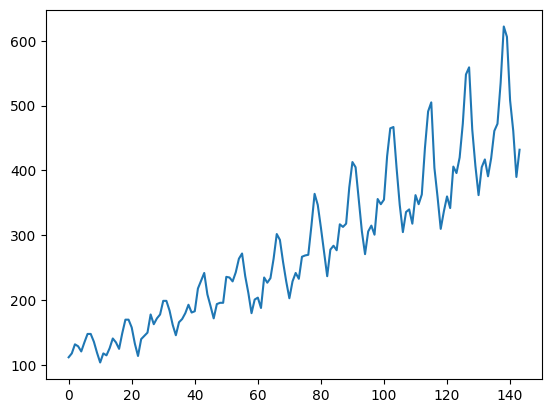

In [33]:
df = pd.read_csv('testData.csv',delimiter=',')
data = df[["Passengers"]].values.astype('float32')
time_step = df[["Month"]].values.astype('float32')
 
plt.plot(timeseries)
plt.show()

In [39]:
data.shape

(144, 1)

In [41]:
# Determine the split point between training and validation data
split_time = 90

# Split time steps into training and validation sets
time_train = time_step[:split_time]
time_valid = time_step[split_time:]

# Split data into training and validation sets
x_train = data[:split_time]
x_valid = data[split_time:]

# Use Min-Max scaling
# Initialize MinMaxScaler
# scaler = MinMaxScaler()

# Reshape and scale the training data
# x_train_scaled = scaler.fit_transform(np.array(x_train).reshape(-1, 1)).flatten()

# Scale the validation data using the same scaler
# x_valid_scaled = scaler.transform(np.array(x_valid).reshape(-1, 1)).flatten()

In [42]:
def windowed_dataset(series, window_size):
    # Create a TensorFlow dataset from the input series
    dataset = tf.data.Dataset.from_tensor_slices(series)
    
    # Window the dataset into fixed-size windows with a specified window_size,
    # shifting the window by 1 at each step, and drop any remaining data that
    # doesn't fit into a complete window
    dataset = dataset.window(window_size, shift=1, drop_remainder=True)
    
    # Flatten the dataset of windows into individual windows and batch them
    dataset = dataset.flat_map(lambda window: window.batch(window_size))
    
    # Map each window to a tuple where the first element contains all but the last
    # element of the window and the second element contains the last element of the window
    dataset = dataset.map(lambda window: (window[:-1], window[-1]))
    
    # Batch the dataset with a batch size of 1 and prefetch it for improved performance
    return dataset.batch(1).prefetch(1)

# Window size
window_size = 10

# Create windowed dataset for training
dataset_train = windowed_dataset(x_train, window_size)

# Create windowed dataset for validation
dataset_valid = windowed_dataset(x_valid, window_size)

In [57]:
dataset_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1), dtype=tf.float32, name=None))>

In [44]:
model = tf.keras.models.Sequential([ 
      tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),input_shape=[None]),
      tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(8, return_sequences=True)),
      tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(5)),
      tf.keras.layers.Dense(1)
  ])

In [47]:
# Compile the model
model.compile(loss="mse", optimizer=tf.keras.optimizers.SGD(),metrics=["mae"])

# Train the model
history = model.fit(dataset_train, epochs=30, validation_data=dataset_valid)

# Evaluate the model
evaluation_result = model.evaluate(dataset_valid)
print("Validation Loss:", evaluation_result)

Epoch 1/30


     79/Unknown 4s 5ms/step - loss: 5887.4771 - mae: 51.6645

2024-04-14 20:52:57.890403: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


81/81 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 5755.5947 - mae: 50.9705 - val_loss: 17942.2676 - val_mae: 110.2499
Epoch 2/30
33/81 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 10368.6348 - mae: 76.6884

2024-04-14 20:52:58.555673: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 5756.6494 - mae: 50.9774 - val_loss: 17944.6797 - val_mae: 110.2604
Epoch 3/30
12/81 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 19095.1035 - mae: 124.3898 

2024-04-14 20:52:58.981683: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-14 20:52:59.089734: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 5757.3403 - mae: 50.9819 - val_loss: 17945.0273 - val_mae: 110.2620
Epoch 4/30
11/81 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 20003.1562 - mae: 129.1102 

2024-04-14 20:52:59.494854: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-14 20:52:59.598278: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 5757.5356 - mae: 50.9833 - val_loss: 17945.1035 - val_mae: 110.2622
Epoch 5/30
10/81 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 21010.2812 - mae: 134.1833 

2024-04-14 20:53:00.017255: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-14 20:53:00.125282: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 5757.6577 - mae: 50.9842 - val_loss: 17945.1094 - val_mae: 110.2622
Epoch 6/30
12/81 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 19095.9570 - mae: 124.3959 

2024-04-14 20:53:00.558489: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-14 20:53:00.662969: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 5757.7700 - mae: 50.9851 - val_loss: 17945.0840 - val_mae: 110.2621
Epoch 7/30
12/81 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 19096.1777 - mae: 124.3974 

2024-04-14 20:53:01.095895: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-14 20:53:01.197438: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 5757.8760 - mae: 50.9858 - val_loss: 17945.0020 - val_mae: 110.2618
Epoch 8/30
12/81 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 19096.4043 - mae: 124.3989 

2024-04-14 20:53:01.610837: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-14 20:53:01.709533: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 5757.9819 - mae: 50.9866 - val_loss: 17944.9062 - val_mae: 110.2614
Epoch 9/30
12/81 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 19096.6230 - mae: 124.4004 

2024-04-14 20:53:02.118305: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-14 20:53:02.216066: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 5758.0845 - mae: 50.9873 - val_loss: 17944.7871 - val_mae: 110.2609
Epoch 10/30
12/81 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 19096.8477 - mae: 124.4019 

2024-04-14 20:53:02.631629: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-14 20:53:02.731147: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 5758.1870 - mae: 50.9881 - val_loss: 17944.6465 - val_mae: 110.2602
Epoch 11/30
12/81 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 19097.0781 - mae: 124.4035 

2024-04-14 20:53:03.134034: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-14 20:53:03.238959: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 5758.2925 - mae: 50.9888 - val_loss: 17944.4980 - val_mae: 110.2596
Epoch 12/30
11/81 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 20004.9531 - mae: 129.1225 

2024-04-14 20:53:03.648522: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-14 20:53:03.747035: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 5758.3955 - mae: 50.9896 - val_loss: 17944.3242 - val_mae: 110.2588
Epoch 13/30
12/81 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 19097.5410 - mae: 124.4065 

2024-04-14 20:53:04.184299: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-14 20:53:04.288027: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 5758.5024 - mae: 50.9903 - val_loss: 17944.1211 - val_mae: 110.2580
Epoch 14/30
12/81 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 19097.7812 - mae: 124.4081 

2024-04-14 20:53:04.709795: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-14 20:53:04.803100: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5758.6094 - mae: 50.9911 - val_loss: 17943.9199 - val_mae: 110.2571
Epoch 15/30
11/81 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 20005.6621 - mae: 129.1271 

2024-04-14 20:53:05.206708: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-14 20:53:05.301221: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 5758.7153 - mae: 50.9918 - val_loss: 17943.7031 - val_mae: 110.2561
Epoch 16/30
12/81 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 19098.2344 - mae: 124.4111 

2024-04-14 20:53:05.726978: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-14 20:53:05.826756: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 5758.8164 - mae: 50.9926 - val_loss: 17943.4492 - val_mae: 110.2550
Epoch 17/30
12/81 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 19098.4531 - mae: 124.4125 

2024-04-14 20:53:06.257236: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-14 20:53:06.353531: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5758.9136 - mae: 50.9933 - val_loss: 17943.2012 - val_mae: 110.2540
Epoch 18/30
12/81 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 19098.6387 - mae: 124.4138 

2024-04-14 20:53:06.754670: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-14 20:53:06.849080: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 5759.0010 - mae: 50.9939 - val_loss: 17942.9199 - val_mae: 110.2527
Epoch 19/30
11/81 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 20006.4453 - mae: 129.1323 

2024-04-14 20:53:07.261163: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-14 20:53:07.354213: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 5759.0752 - mae: 50.9945 - val_loss: 17942.6504 - val_mae: 110.2516
Epoch 20/30
11/81 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 20006.5645 - mae: 129.1332 

2024-04-14 20:53:07.779931: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-14 20:53:07.878041: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 5759.1343 - mae: 50.9950 - val_loss: 17942.3691 - val_mae: 110.2504
Epoch 21/30
11/81 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 20006.6465 - mae: 129.1339 

2024-04-14 20:53:08.308506: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-14 20:53:08.412529: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 5759.1782 - mae: 50.9954 - val_loss: 17942.0859 - val_mae: 110.2491
Epoch 22/30
11/81 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 20006.6836 - mae: 129.1342 

2024-04-14 20:53:08.846070: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-14 20:53:08.943164: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 5759.2031 - mae: 50.9957 - val_loss: 17941.8105 - val_mae: 110.2480
Epoch 23/30
11/81 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 20006.6855 - mae: 129.1344 

2024-04-14 20:53:09.376455: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-14 20:53:09.470484: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 5759.2144 - mae: 50.9959 - val_loss: 17941.5410 - val_mae: 110.2468
Epoch 24/30
11/81 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 20006.6562 - mae: 129.1344 

2024-04-14 20:53:09.893798: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-14 20:53:09.986718: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 5759.2129 - mae: 50.9960 - val_loss: 17941.2949 - val_mae: 110.2457
Epoch 25/30
11/81 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 20006.6055 - mae: 129.1343 

2024-04-14 20:53:10.427349: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-14 20:53:10.534548: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 5759.2021 - mae: 50.9961 - val_loss: 17941.0645 - val_mae: 110.2447
Epoch 26/30
 1/81 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 36250.2969 - mae: 190.3951

2024-04-14 20:53:10.989684: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-14 20:53:11.107049: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 5759.1870 - mae: 50.9961 - val_loss: 17940.8574 - val_mae: 110.2438
Epoch 27/30
11/81 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 20006.4629 - mae: 129.1338 

2024-04-14 20:53:11.541820: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-14 20:53:11.638056: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 5759.1641 - mae: 50.9961 - val_loss: 17940.6680 - val_mae: 110.2430
Epoch 28/30
11/81 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 20006.3867 - mae: 129.1336 

2024-04-14 20:53:12.058562: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-14 20:53:12.151627: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 5759.1436 - mae: 50.9961 - val_loss: 17940.5273 - val_mae: 110.2424
Epoch 29/30
 1/81 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 36251.2266 - mae: 190.3976

2024-04-14 20:53:12.575813: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-14 20:53:12.702909: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 5759.1191 - mae: 50.9960 - val_loss: 17940.3789 - val_mae: 110.2417
Epoch 30/30
11/81 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 20006.2207 - mae: 129.1330 

2024-04-14 20:53:13.160674: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-14 20:53:13.260316: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 5759.0981 - mae: 50.9960 - val_loss: 17940.2578 - val_mae: 110.2412
     25/Unknown 0s 2ms/step - loss: 8095.9868 - mae: 72.7391 

2024-04-14 20:53:13.695371: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-14 20:53:13.790497: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10712.7783 - mae: 82.9368
Validation Loss: [17940.2578125, 110.2412109375]


2024-04-14 20:53:13.911139: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


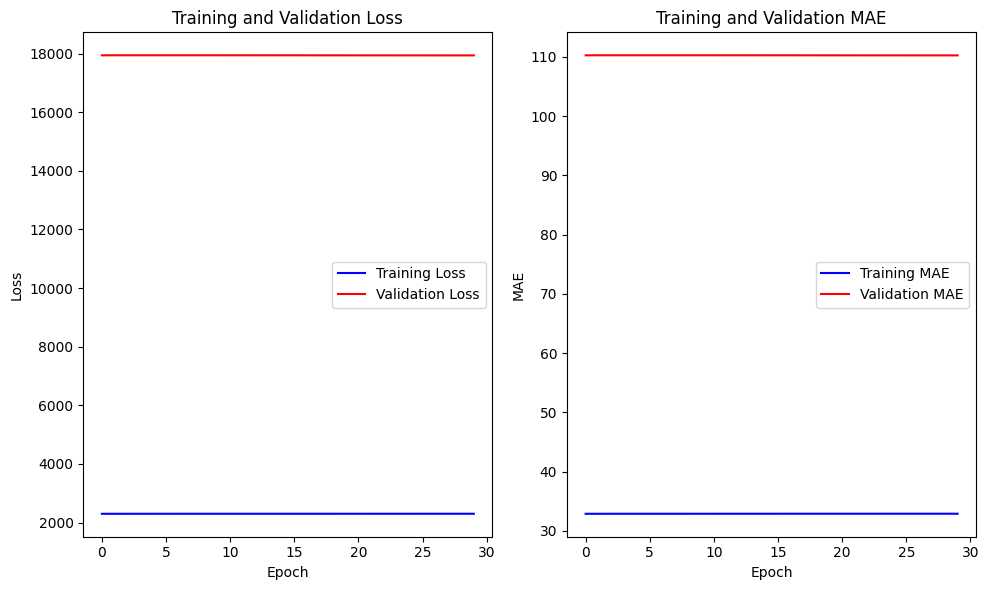

In [48]:
# Plot training and validation loss over epochs
plt.figure(figsize=(10, 6))

# Plot training loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation MAE over epochs
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE', color='blue')
plt.plot(history.history['val_mae'], label='Validation MAE', color='red')
plt.title('Training and Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.show()

In [58]:
current_window

array([472.     , 535.     , 622.     , 606.     , 508.     , 461.     ,
       390.     , 432.     , 309.40076, 309.40076], dtype=float32)

In [59]:
validation_time_steps

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53])

In [54]:
# Predict on the validation dataset
num_predictions_beyond_validation = 2
validation_predictions = []

# Use the last window_size from the training set for predictions
current_window = x_train[-window_size:]

# Adjust time steps for validation predictions
validation_time_steps = np.arange(len(x_valid))

for time in range(len(validation_time_steps) + num_predictions_beyond_validation):
    
    # Predict the next values using the model on the validation dataset
    predicted_value_scaled = model.predict(np.array(current_window[-window_size:]).reshape(1, -1))[0]
    # Append the predicted value to the list of predictions
    validation_predictions.append(predicted_value_scaled)

    # Print the actual and predicted values during validation along with the time step
    if time < len(x_valid):
        actual_value_scaled = x_valid[time]
        # Denormalize the actual value
        #actual_value_denormalized = scaler.inverse_transform(np.array(actual_value_scaled).reshape(1, -1)).flatten()
        # Denormalize the predicted value
        #predicted_value_denormalized = scaler.inverse_transform(np.array(predicted_value_scaled).reshape(1, -1)).flatten()
        print(f'Time: {time_valid[time]}, Actual: {actual_value_scaled}, Predicted: {actual_value_scaled}')

    # Update the current window for the next iteration using the true value from the validation set
    if time < len(x_valid):
        current_window = np.append(current_window, x_valid[time])[1:]

    else:
        # Print the predicted value beyond validation along with the time step
        # Denormalize the predicted value beyond validation
        #predicted_value_denormalized = scaler.inverse_transform(np.array(predicted_value_scaled).reshape(1, -1)).flatten()
        print(f'Time: {time_valid[-1] + time - len(x_valid) + 1}, Predicted (Beyond Validation): {predicted_value_scaled}')
        current_window = np.append(current_window, predicted_value_scaled)[-window_size:]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Time: [90.], Actual: [413.], Predicted: [413.]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Time: [91.], Actual: [405.], Predicted: [405.]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Time: [92.], Actual: [355.], Predicted: [355.]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Time: [93.], Actual: [306.], Predicted: [306.]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Time: [94.], Actual: [271.], Predicted: [271.]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Time: [95.], Actual: [306.], Predicted: [306.]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Time: [96.], Actual: [315.], Predicted: [315.]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Time: [97.], Actual: [301.], Predicted: [301.]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Time: [98.], Actual: [356.], Predicted: [356.]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Time: [99.], Actual: [348.], Predicted: [348.]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Time: [100.], Actual: [355.], Predicted: [355.]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Time: [101.], Actual: [422

ValueError: x and y must be the same size

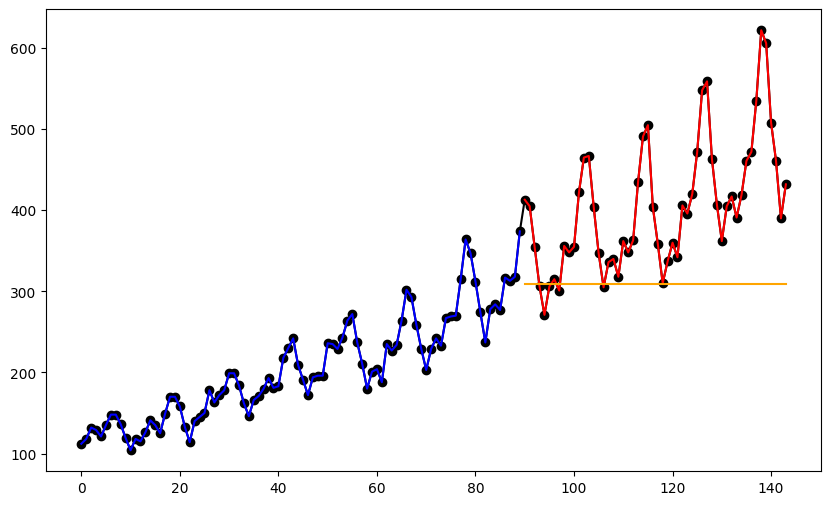

In [56]:
# Plot the original data, training data, validation data, and predictions
plt.figure(figsize=(10, 6))

# Plot original data in blue
plt.plot(time_step, data, label='Original Data', marker='o', linestyle='-', color='black')

# Plot training data in green
plt.plot(time_step[:split_time], data[:split_time], label='Training Data', color='blue')

# Plot validation data in orange
plt.plot(time_valid, data[split_time:], label='Validation Data', color='red')

# Denormalize validation predictions
# validation_predictions_denormalized = scaler.inverse_transform(np.array(validation_predictions).reshape(-1, 1)).flatten()

# Plot predictions (Validation)
plt.plot(time_valid, validation_predictions[:len(time_valid)], label='Predictions (Validation)', color='orange')

# Highlight the last few predictions beyond the validation set in red
# last_predictions_beyond_validation_denormalized = scaler.inverse_transform(np.array(validation_predictions[-num_predictions_beyond_validation:]).reshape(-1, 1)).flatten()
time_last_predictions_beyond_validation = np.arange(split_time + len(time_valid), split_time + len(time_valid) + num_predictions_beyond_validation)
plt.scatter(time_last_predictions_beyond_validation, num_predictions_beyond_validation, color='red', marker='X', label='Last Predictions Beyond Validation')

plt.legend()
plt.title('Original Data, Training Data, Validation Data, and Predictions')
plt.xlabel('Time Step')
plt.ylabel('Values')
plt.show()